In [116]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [151]:
def tank(z,t,min,tin,cp,q):
    m = z[0]
    te = z[1]
    dmdt = min - m
    dTdt = (min/m)*tin - te + q/(cp*m)
    dzdt = [dmdt,dTdt]
    return dzdt

def tank_improved(z,t,min,tin,cp,q,rho,g,r,a):
    h = z[0]
    te = z[1]
    dhdt = (1/a) * ((min/rho) - (rho*g*h/r))
    dTdt = (min/(rho*rho*g*h/r))*tin - te + q/(cp*(rho*rho*g*h/r))
    dzdt = [dhdt,dTdt]
    return dzdt


In [179]:
# heater model parameters
t = np.linspace(0,200,1000)

tin = 293.15
q = 150000
cp = 4.2

# tank model parameters 
min = 3000.0
h0 = 2
rho = 1000
r = 20000
a = np.pi * 1.5**2
g = 9.8


z0 = [h0,tin]

In [180]:
z = odeint(tank_improved,z0,t,args=(min,tin,cp,q,rho,g,r,a,))
h = z[:,0]
te = z[:,1]
te = te - 273.15

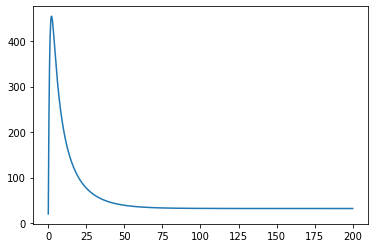

In [184]:
plt.plot(t,te)
plt.show()

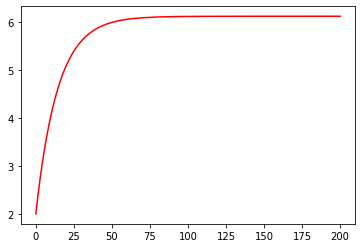

In [155]:
plt.plot(t,h,'r-')
plt.show()